In [36]:
# Importing Packages

import nltk #Tokenizing
import re #Preprocessing
import matplotlib.pyplot as plt
import bs4 as bs
import urllib.request #Scraping
import heapq #getting the top k largest sentences

# Importing classes within the packages

from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import stopwords #Don't consider stopwords in histogram
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import *
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from nltk import FreqDist
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [37]:
from nltk.corpus import PlaintextCorpusReader
corpus = PlaintextCorpusReader('transcripts', '.+\.txt', encoding='Latin-1')
fids = corpus.fileids()
print(fids)

['01_02_19.txt', '01_06_18.txt', '01_09_11.txt', '01_10_15.txt', '02_02_11.txt', '03_08_11.txt', '08_07_11.txt', '08_08_11.txt', '11_10_18.txt', '12_09_18.txt', '13_11_15.txt', '14_08_11.txt', '14_11_18.txt', '15_11_18.txt', '16_03_18.txt', '16_05_18.txt', '16_08_11.txt', '16_11_18.txt', '17_02_15.txt', '18_05_11.txt', '19_08_09.txt', '19_08_18.txt', '21_05_11.txt', '21_10_11.txt', '23_08_15.txt', '24_04_18.txt', '24_09_15.txt', '25_01_19.txt', '26_04_18.txt', '26_10_15.txt', '27_04_18.txt', '27_09_15.txt', '28_04_18.txt', '28_09_15.txt', '29_03_15.txt', '29_08_11.txt', '29_09_15.txt', '31_08_11.txt', '31_10_11.txt', '31_10_15.txt']


In [47]:
# convert words in each document to lower case
# For each file ID in fids, the code below takes its words. All these files are then combined into a single list called 'docs'.

doc_list = [corpus.words(f) for f in fids]
print(doc_list[1:3])
docs_lower = [[w.lower() for w in doc] for doc in doc_list]

# Use regular expression to keep only alphabetic words.

words_only = [[w for w in doc if re.search('^[a-z]+$', w)] for doc in docs_lower]
print(words_only[0][0:20])

# Remove stop words.
from nltk.corpus import stopwords
stop_list = stopwords.words('english')
docs_stopremoved = [[w for w in doc if w not in stop_list] for doc in words_only]


# Perform Porter stemming.
from nltk.stem.porter import *
stemmer = PorterStemmer()
docs_stem = [[stemmer.stem(w) for w in doc] for doc in docs_stopremoved]

# We use a Word Lemmatizer
lemmatizer = WordNetLemmatizer()
docs_lemma = [[lemmatizer.lemmatize(w) for w in doc] for doc in docs_stopremoved]

print(docs_lemma[0][0:10])

[['Prime', 'Minister', 'of', 'the', 'Republic', 'of', ...], ['Mr', 'President', 'Chief', 'Justice', 'Excellencies', ...]]
['this', 'year', 'we', 'are', 'commemorating', 'the', 'singapore', 'bicentennial', 'years', 'ago', 'stamford', 'raffles', 'arrived', 'in', 'singapore', 'that', 'marked', 'a', 'crucial', 'turning']
['year', 'commemorating', 'singapore', 'bicentennial', 'year', 'ago', 'stamford', 'raffle', 'arrived', 'singapore']


In [50]:
# Getting frequencies

list_of_all_words= []

[[list_of_all_words.append(w) for w in doc] for doc in docs_lemma]

fdist = nltk.FreqDist(list_of_all_words)
freq_list=(fdist.most_common())
print(freq_list)

freq_dict={}

for i in freq_list:
    freq_dict[i[0]]=i[1]

[('singapore', 707), ('year', 521), ('minister', 447), ('one', 433), ('u', 416), ('also', 363), ('mr', 360), ('people', 343), ('government', 332), ('many', 319), ('singaporean', 311), ('new', 301), ('think', 276), ('country', 255), ('make', 242), ('work', 241), ('time', 240), ('good', 227), ('together', 208), ('would', 199), ('need', 199), ('lee', 190), ('world', 180), ('flat', 179), ('well', 176), ('first', 173), ('china', 173), ('take', 172), ('help', 172), ('like', 169), ('life', 158), ('want', 158), ('must', 153), ('worker', 151), ('go', 151), ('society', 150), ('get', 150), ('problem', 148), ('prime', 146), ('come', 145), ('even', 144), ('way', 141), ('every', 141), ('election', 141), ('better', 140), ('next', 138), ('thing', 137), ('different', 135), ('ministry', 134), ('economy', 134), ('future', 133), ('two', 133), ('pm', 133), ('asean', 132), ('family', 132), ('national', 130), ('education', 130), ('home', 128), ('state', 128), ('team', 128), ('know', 126), ('may', 125), ('las

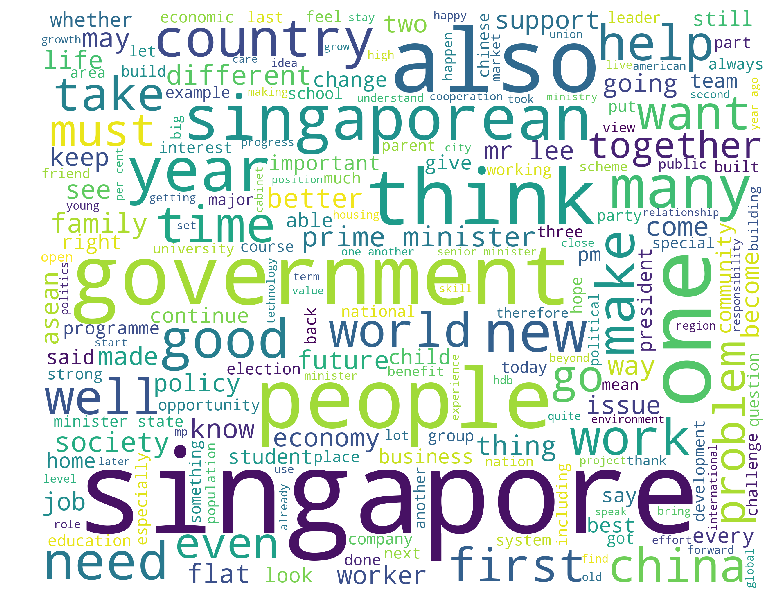

In [51]:
def word_cloud(list_of_all_words, color = 'black'):
    words = ' '.join(list_of_all_words)
    wordcloud = WordCloud(background_color=color,width=2500,height=2000).generate(words)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
word_cloud(list_of_all_words,'white')

In [ ]:
import gensim
from gensim import corpora
dictionary = corpora.Dictionary(docs_stem)
print(dictionary)

In [34]:
# getting number of unique tokens
dictionary = corpora.Dictionary(docs_stem)
print(dictionary)

# we create a dictionary with the unique words
token_to_id = dictionary.token2id

# converting document to vector
first_doc = docs_stem[0]
print(first_doc[0:10])

Dictionary(5697 unique tokens: ['add', 'adjust', 'age', 'ago', 'along']...)
['year', 'commemor', 'singapor', 'bicentenni', 'year', 'ago', 'stamford', 'raffl', 'arriv', 'singapor']


In [35]:
# Converting all documents to a list of sparse vectors.

# Converting all documents in sample data to a list of sparse vectors.
# word ids are the same for all the documents in the list of documents

vecs = [dictionary.doc2bow(doc) for doc in docs_stem]